# Project Setting


In [1]:

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import pandas as pd

# import seaborn as sns
# sns.set_theme(style='darkgrid', context='talk')

import os
from importlib import reload


import src.modules.data_cleaning as dc
import src.modules.data_preprocessing as dp


global DATA_FOLDER, SRC_FOLDER, MODULES_FOLDER, TESTS_FOLDER, OUTPUT_FOLDER, FIGURES_FOLDER

# Define folder paths as global variables
DATA_FOLDER = "data/"
SRC_FOLDER = "src/"
MODULES_FOLDER = "src/modules/"
TESTS_FOLDER = "src/tests/"
OUTPUT_FOLDER = "output/"
FIGURES_FOLDER = "output/figures/"

global DATA_PATH, DATA_ORIGINAL_PATH, DATA_GENERATED_PATH, IMAGE_GENERATED_PATH

DATA_PATH = DATA_FOLDER
DATA_ORIGINAL_PATH = DATA_FOLDER
DATA_GENERATED_PATH = OUTPUT_FOLDER
IMAGE_GENERATED_PATH = FIGURES_FOLDER


global COLORS

COLORS = ['#636EFA', '#00CC96', '#EF553B', '#AB63FA', '#FFA15A', '#19D3F3', '#FF6692', '#B6E880', '#FF97FF', '#FECB52']

global LSTM1_OUT_PATH
LSTM1_OUT_PATH = DATA_GENERATED_PATH + 'LSTM_1/'

ModuleNotFoundError: No module named 'src.modules.data_preprocessing'

In [4]:
# read the data/Czech Republic 2021-12-03 to 2021-12-18.csv data/Czech Republic 2020-12-03 to 2020-12-18.csv

weather_all_countries_2021 = pd.read_csv(DATA_ORIGINAL_PATH + 'Czech Republic 2021-12-03 to 2021-12-18.csv')
weather_all_countries_2020 = pd.read_csv(DATA_ORIGINAL_PATH + 'Czech Republic 2020-12-03 to 2020-12-18.csv')
weather_all_countries_2019 = pd.read_csv(DATA_ORIGINAL_PATH + 'Czech Republic 2019-12-03 to 2019-12-18.csv')


In [5]:
dc.print_df_with_dtypes(weather_all_countries_2021, data_generated_path=DATA_GENERATED_PATH)

+-----+----------------+------------+-----------+-----------+-----------+----------------+----------------+-------------+-----------+------------+-----------+--------------+---------------+--------------+-----------+-------------+------------+-------------+-----------+--------------------+--------------+--------------+------------------+---------------+-----------+--------------+---------------------+---------------------+-------------+------------------------------+------------------------------------------------------------------------------------+-------------------+------------------------------------------------------------------------------------------------------------------------------+
|     | name           | datetime   |   tempmax |   tempmin |      temp |   feelslikemax |   feelslikemin |   feelslike |       dew |   humidity |    precip |   precipprob |   precipcover | preciptype   |      snow |   snowdepth |   windgust |   windspeed |   winddir |   sealevelpressure |   clo

In [6]:
# concatenate the two dataframes
weather_all_countries = pd.concat([weather_all_countries_2021, weather_all_countries_2020], axis=0)

In [7]:
weather_all_countries_2021.shape
weather_all_countries_2020.shape

weather_all_countries.shape

weather_all_countries.columns

weather_all_countries.conditions.unique()


(336, 33)

(336, 33)

(672, 33)

Index(['name', 'datetime', 'tempmax', 'tempmin', 'temp', 'feelslikemax',
       'feelslikemin', 'feelslike', 'dew', 'humidity', 'precip', 'precipprob',
       'precipcover', 'preciptype', 'snow', 'snowdepth', 'windgust',
       'windspeed', 'winddir', 'sealevelpressure', 'cloudcover', 'visibility',
       'solarradiation', 'solarenergy', 'uvindex', 'severerisk', 'sunrise',
       'sunset', 'moonphase', 'conditions', 'description', 'icon', 'stations'],
      dtype='object')

array(['Snow, Partially cloudy', 'Overcast', 'Partially cloudy',
       'Snow, Rain, Partially cloudy', 'Snow, Rain, Overcast',
       'Rain, Overcast', 'Clear', 'Rain, Partially cloudy',
       'Snow, Overcast', 'Rain'], dtype=object)

In [9]:
# save weather_all_countries to csv
weather_all_countries.to_csv(DATA_GENERATED_PATH + 'weather_all_countries.csv', index=False)

Text(0.5, 0.98, 'Distribution of Unique Descriptions in Weather Data')

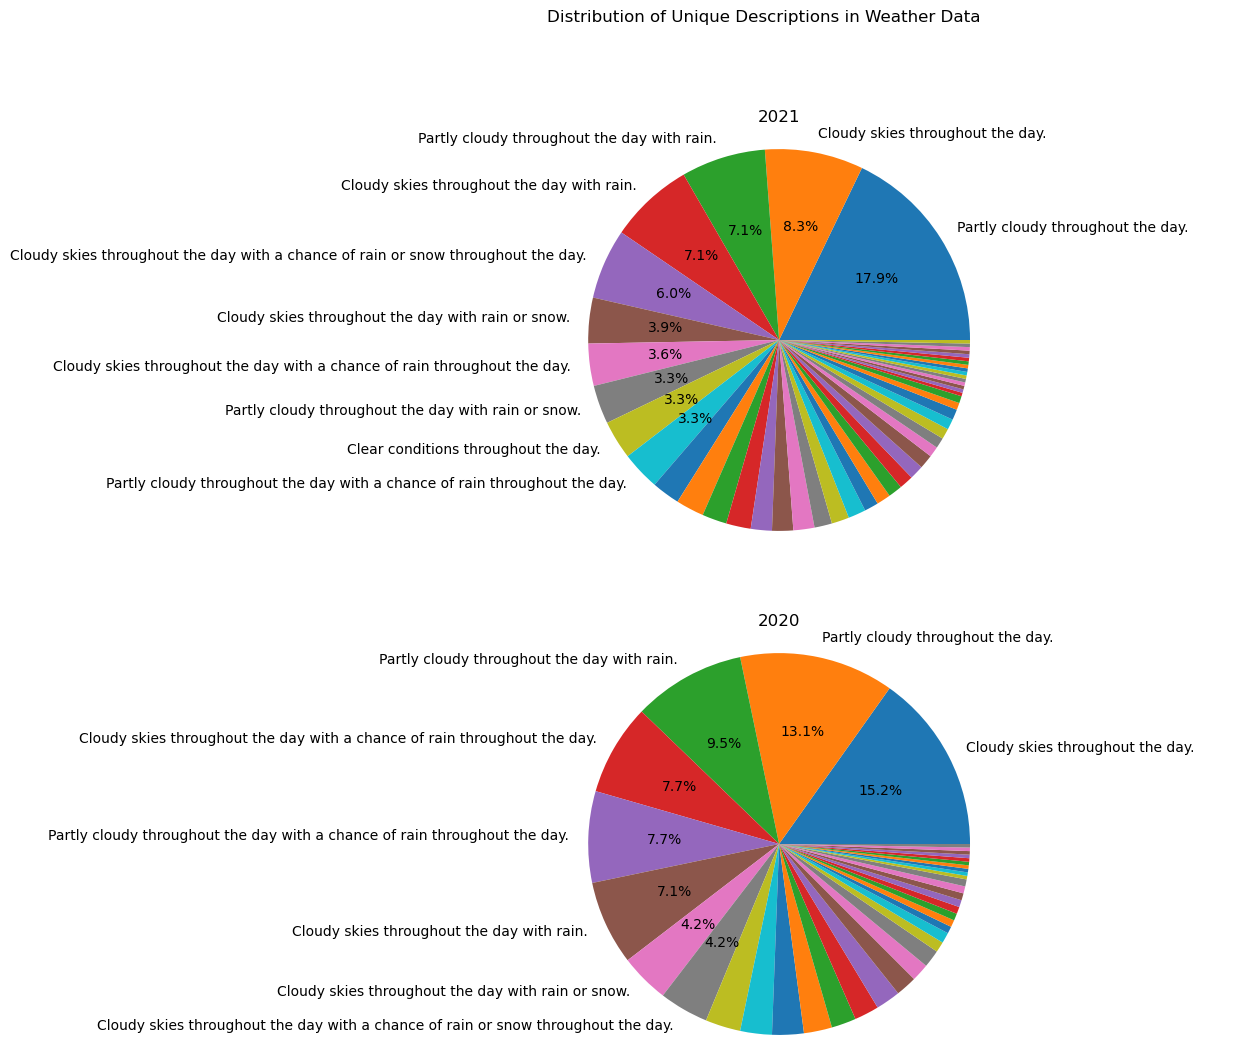

In [33]:
import matplotlib.pyplot as plt

def custom_autopct(pct):
    return ('%1.1f%%' % pct) if pct > 3 else ''

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))

# Pie chart for 2021
description_counts_2021 = weather_all_countries_2021['description'].value_counts()
pct_2021 = 100 * description_counts_2021 / description_counts_2021.sum()
_ = ax1.pie(description_counts_2021, labels=[label if pct > 3 else '' for pct, label in zip(pct_2021, description_counts_2021.index)], autopct=custom_autopct)
_ = ax1.set_title("2021")
_ = ax1.axis('equal')

# Pie chart for 2020
description_counts_2020 = weather_all_countries_2020['description'].value_counts()
pct_2020 = 100 * description_counts_2020 / description_counts_2020.sum()
_ = ax2.pie(description_counts_2020, labels=[label if pct > 3 else '' for pct, label in zip(pct_2020, description_counts_2020.index)], autopct=custom_autopct)
_ = ax2.set_title("2020")
_ = ax2.axis('equal')

fig.suptitle("Distribution of Unique Descriptions in Weather Data")
plt.show()


In [23]:
# list all the object type columns and the nunique and unique values

object_columns = weather_all_countries.select_dtypes(include='object').columns

for col in object_columns:
    unique_values = weather_all_countries[col].unique()
    num_unique_values = weather_all_countries[col].nunique()
    print(f"Column: {col}")
    print(f"Number of unique values: {num_unique_values}")
    print(f"Unique values: {unique_values}")
    print("\n")


Column: name
Number of unique values: 21
Unique values: ['Sweden' 'Poland' 'Hungary' 'Portugal' 'Slovakia' 'Denmark'
 'Czech Republic' 'Netherlands' 'Finland' 'Romania' 'Bulgaria' 'Ireland'
 'France' 'Spain' 'Italy' 'Croatia' 'Germany' 'Austria' 'United Kingdom'
 'Slovenia' 'Belgium']


Column: datetime
Number of unique values: 32
Unique values: ['2021-12-03' '2021-12-04' '2021-12-05' '2021-12-06' '2021-12-07'
 '2021-12-08' '2021-12-09' '2021-12-10' '2021-12-11' '2021-12-12'
 '2021-12-13' '2021-12-14' '2021-12-15' '2021-12-16' '2021-12-17'
 '2021-12-18' '2020-12-03' '2020-12-04' '2020-12-05' '2020-12-06'
 '2020-12-07' '2020-12-08' '2020-12-09' '2020-12-10' '2020-12-11'
 '2020-12-12' '2020-12-13' '2020-12-14' '2020-12-15' '2020-12-16'
 '2020-12-17' '2020-12-18']


Column: preciptype
Number of unique values: 3
Unique values: ['snow' nan 'rain,snow' 'rain']


Column: sunrise
Number of unique values: 670
Unique values: ['2021-12-03T08:21:24' '2021-12-04T08:23:13' '2021-12-05T08:24:58'
 '20

Text(0.5, 0.98, 'Distribution of Unique Icons in Weather Data')

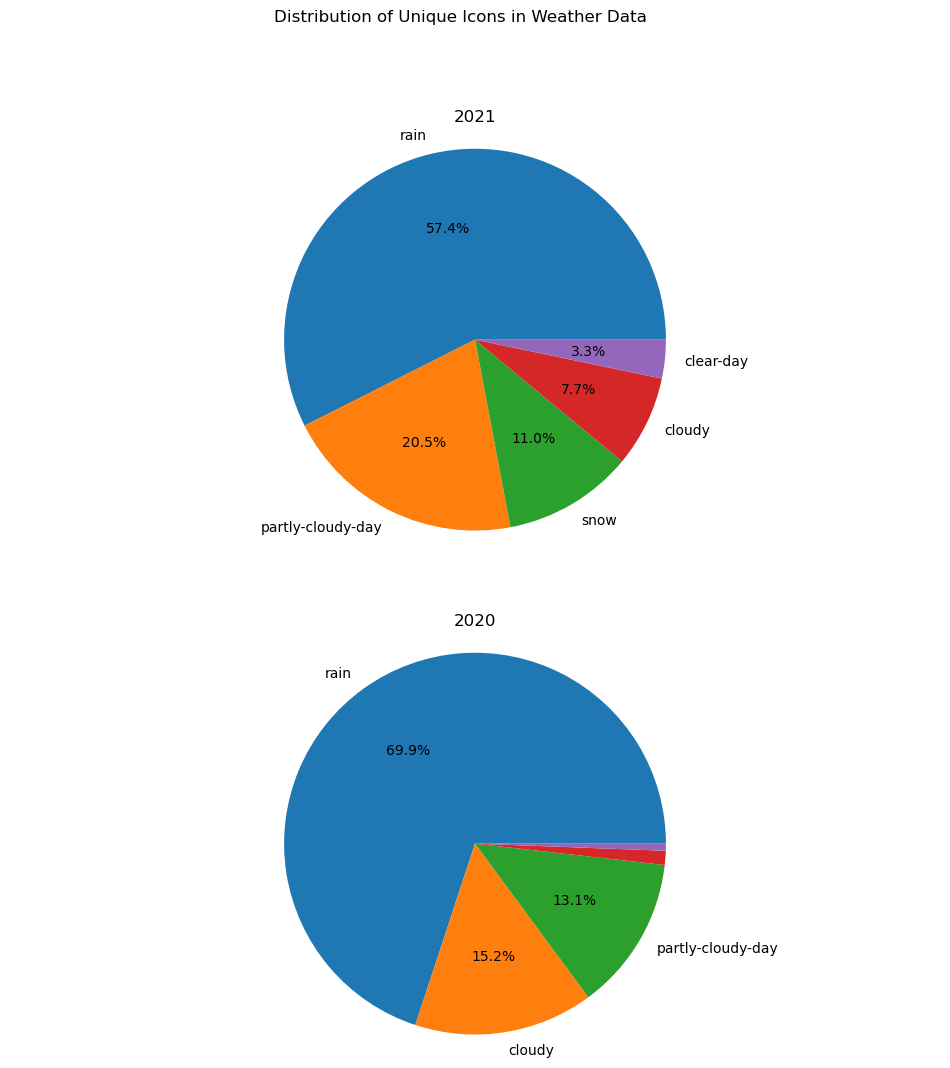

In [32]:
import matplotlib.pyplot as plt

def custom_autopct(pct):
    return ('%1.1f%%' % pct) if pct > 3 else ''

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))

# Pie chart for 2021
description_counts_2021 = weather_all_countries_2021['icon'].value_counts()
pct_2021 = 100 * description_counts_2021 / description_counts_2021.sum()
_ = ax1.pie(description_counts_2021, labels=[label if pct > 3 else '' for pct, label in zip(pct_2021, description_counts_2021.index)], autopct=custom_autopct)
_ = ax1.set_title("2021")
_ = ax1.axis('equal')

# Pie chart for 2020
description_counts_2020 = weather_all_countries_2020['icon'].value_counts()
pct_2020 = 100 * description_counts_2020 / description_counts_2020.sum()
_ = ax2.pie(description_counts_2020, labels=[label if pct > 3 else '' for pct, label in zip(pct_2020, description_counts_2020.index)], autopct=custom_autopct)
_ = ax2.set_title("2020")
_ = ax2.axis('equal')

fig.suptitle("Distribution of Unique Icons in Weather Data")
plt.show()


Text(0.5, 0.98, 'Distribution of Unique Conditions in Weather Data')

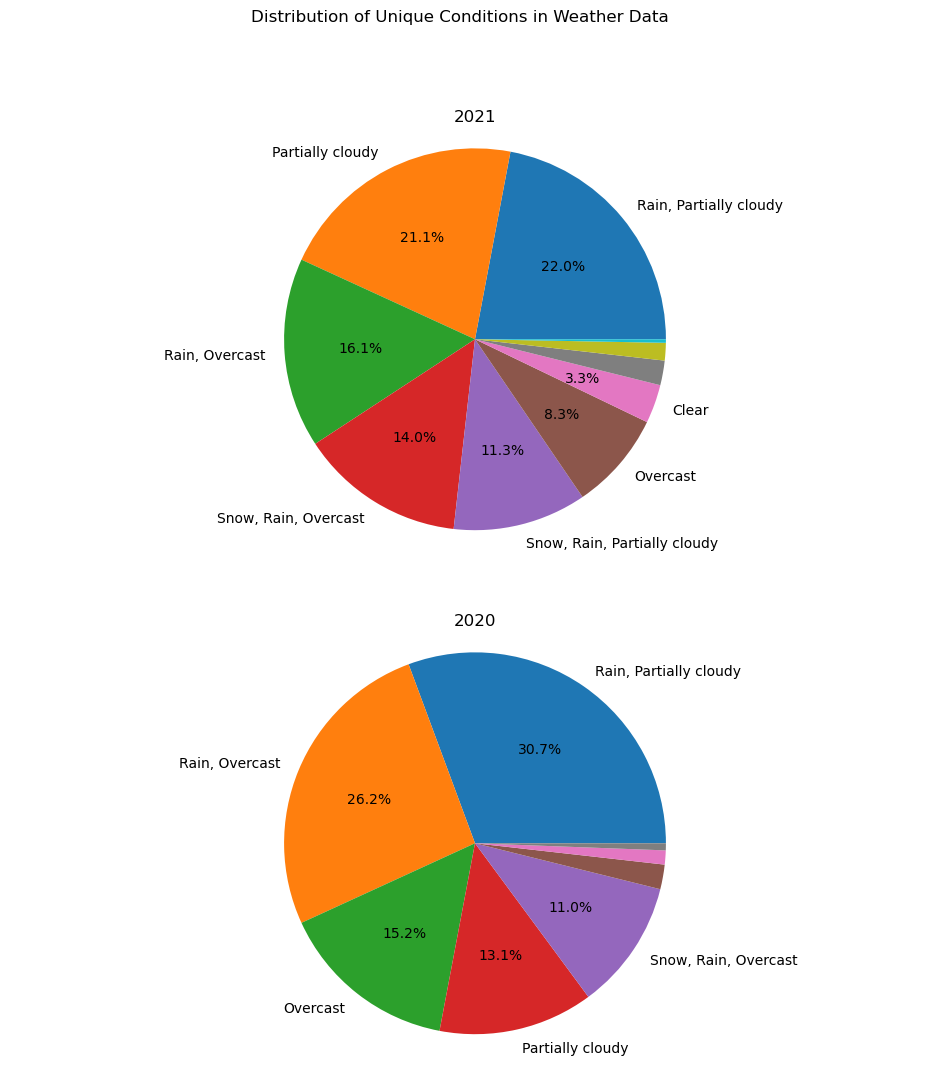

In [35]:
import matplotlib.pyplot as plt

def custom_autopct(pct):
    return ('%1.1f%%' % pct) if pct > 3 else ''

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))

# Pie chart for 2021
description_counts_2021 = weather_all_countries_2021['conditions'].value_counts()
pct_2021 = 100 * description_counts_2021 / description_counts_2021.sum()
_ = ax1.pie(description_counts_2021, labels=[label if pct > 3 else '' for pct, label in zip(pct_2021, description_counts_2021.index)], autopct=custom_autopct)
_ = ax1.set_title("2021")
_ = ax1.axis('equal')

# Pie chart for 2020
description_counts_2020 = weather_all_countries_2020['conditions'].value_counts()
pct_2020 = 100 * description_counts_2020 / description_counts_2020.sum()
_ = ax2.pie(description_counts_2020, labels=[label if pct > 3 else '' for pct, label in zip(pct_2020, description_counts_2020.index)], autopct=custom_autopct)
_ = ax2.set_title("2020")
_ = ax2.axis('equal')

fig.suptitle("Distribution of Unique Conditions in Weather Data")
plt.show()
